In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape
#this will tell us all the (rows,headers)

(301, 9)

In [30]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())
#this will be returning unique values in these selected values

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [10]:
#check missing or null values, the function show how many missing/null values are in each column 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [17]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
final_dataset['Carent_Year']=2020
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Carent_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [21]:
#the function is to create a column that show old each car is 
final_dataset['no_years']=final_dataset['Carent_Year']-final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Carent_Year,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [28]:
# Drop the 'Year' column as it's not needed for analysis
# axis=1: drop column (axis=0 would drop rows)
# inplace=True: modify the DataFrame directly without creating a copy
final_dataset.drop(['Carent_Year'], axis=1, inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [29]:
# Convert categorical (text) columns into numerical dummy variables using one-hot encoding
# drop_first=True: drops the first dummy column for each category to prevent multicollinearity
# This is necessary because machine learning models require numerical input
final_dataset=pd.get_dummies(final_dataset , drop_first=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


In [32]:
#checking how feature is correlated to the other
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [33]:
import seaborn as sns

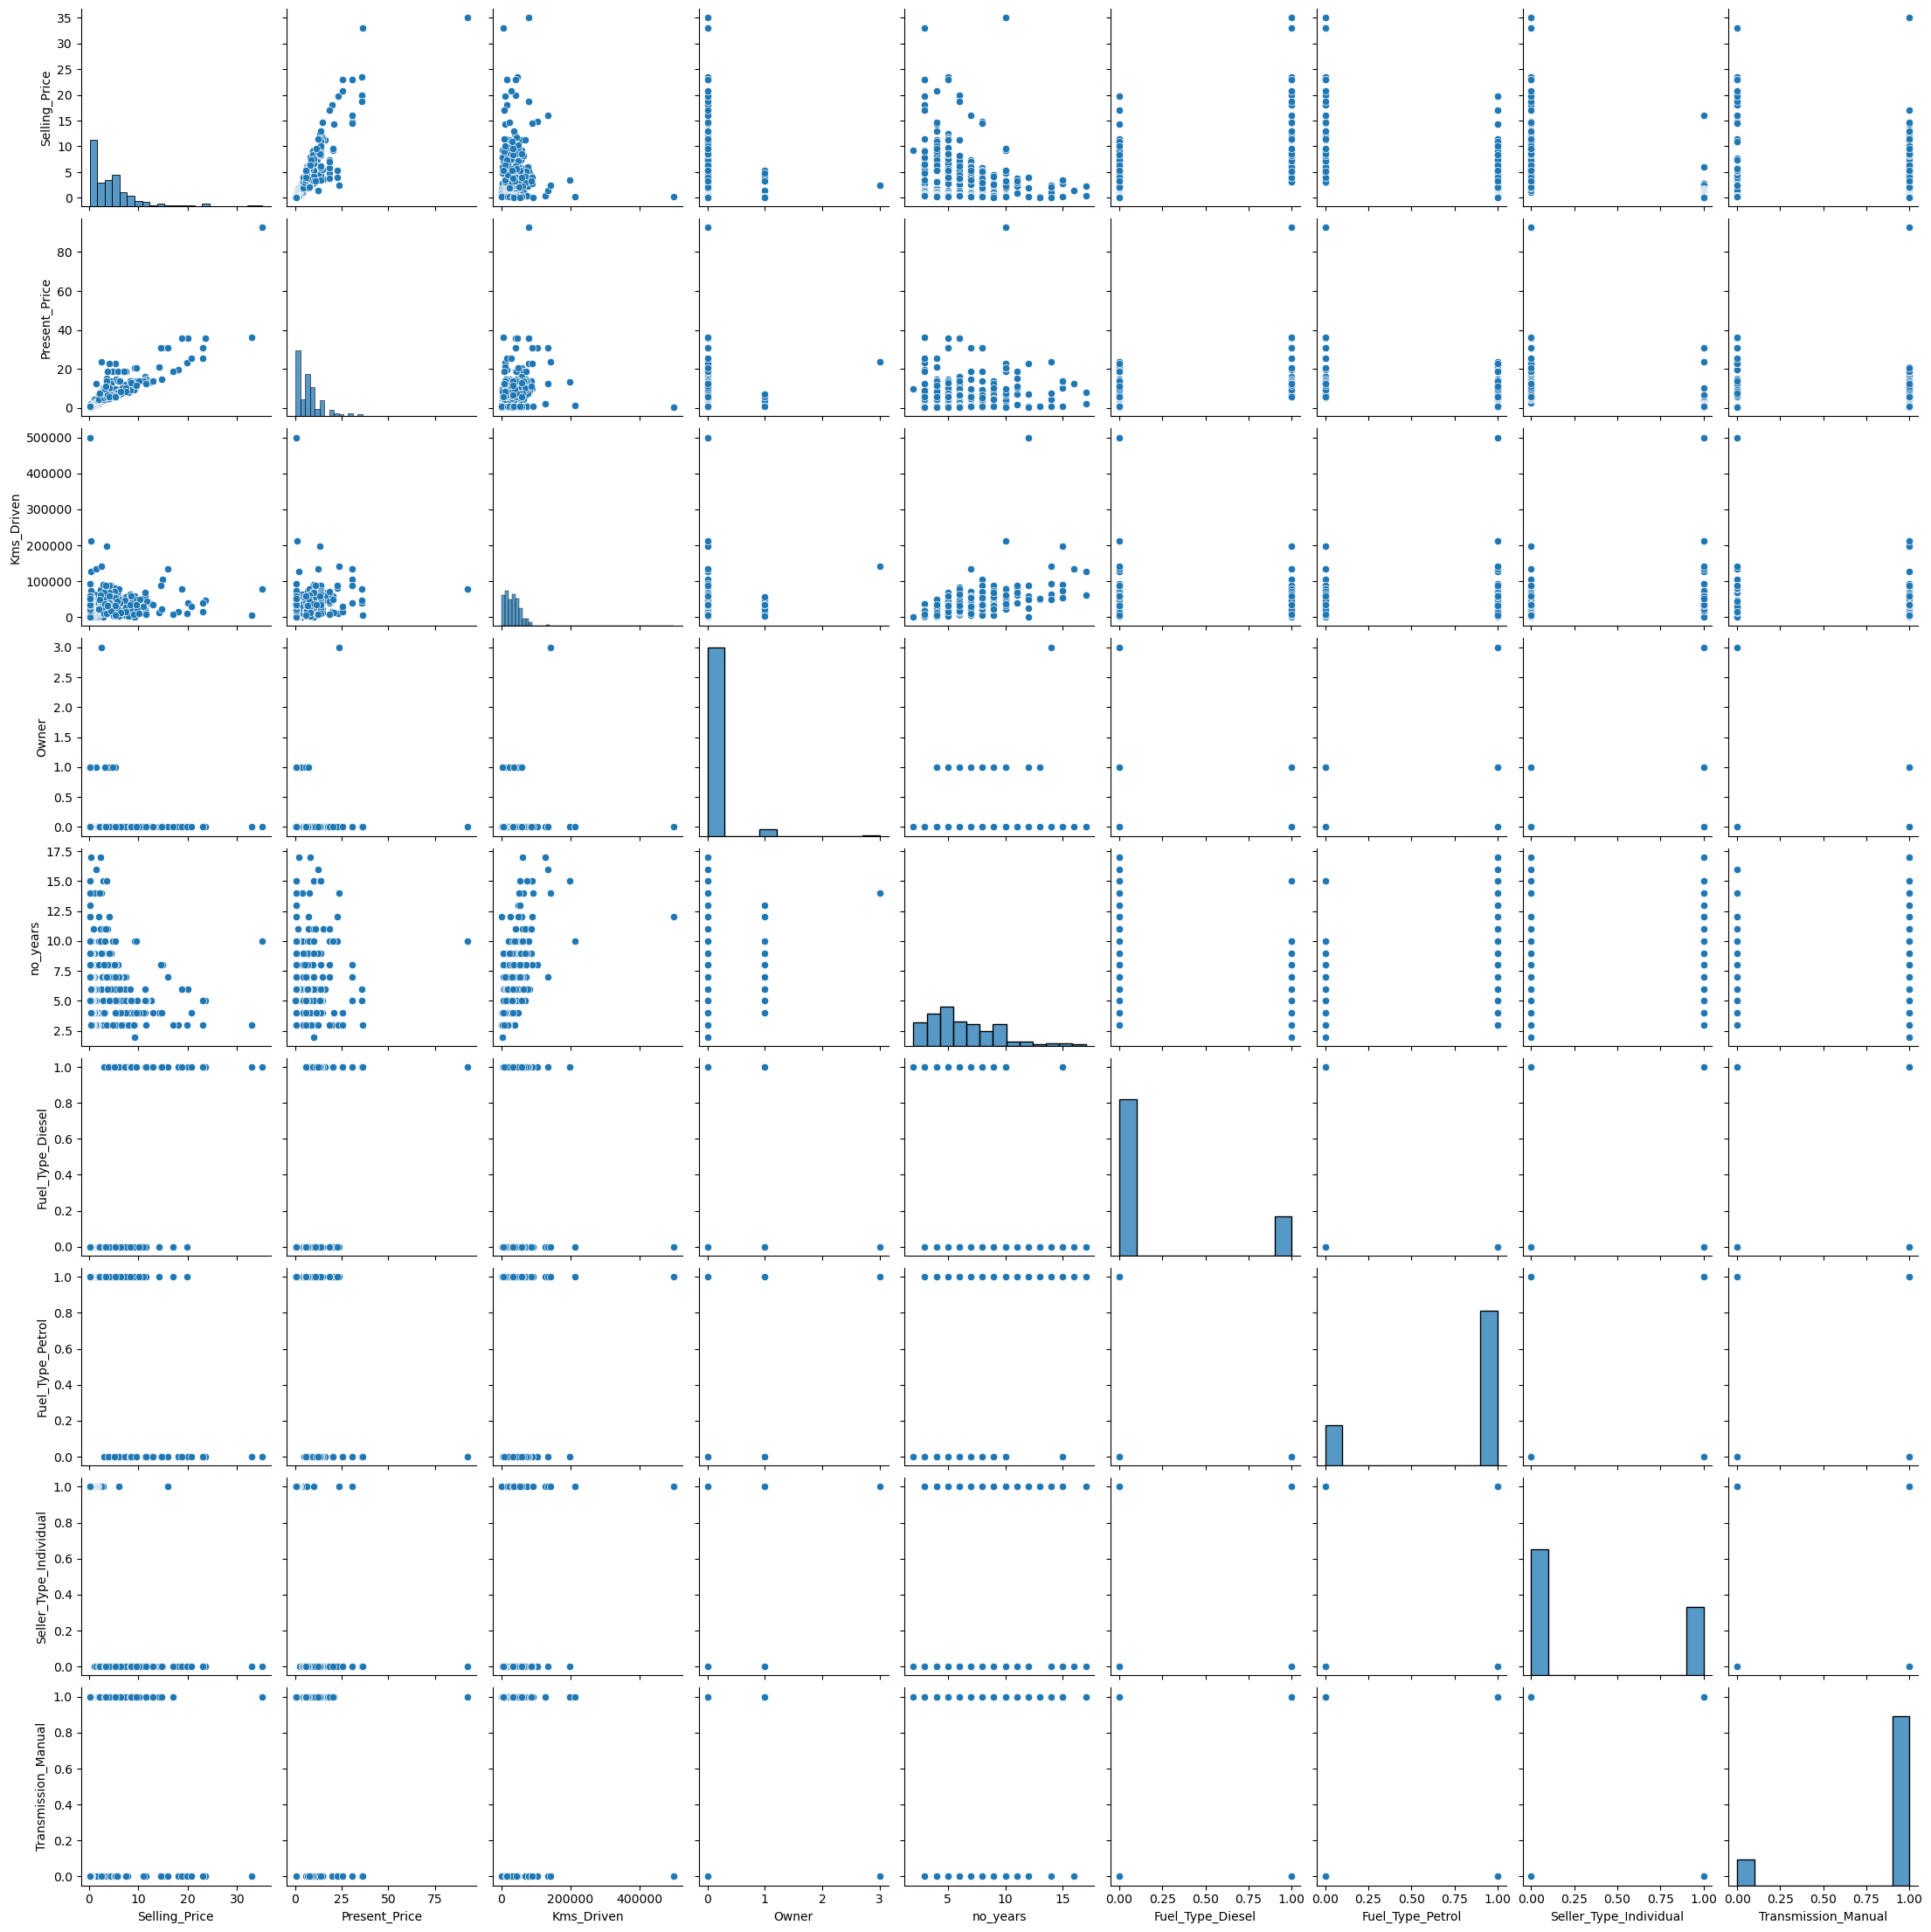

In [34]:
#Creates a grid of plots that shows relationships between all pairs of numerical columns in your dataset.
sns.pairplot(final_dataset)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

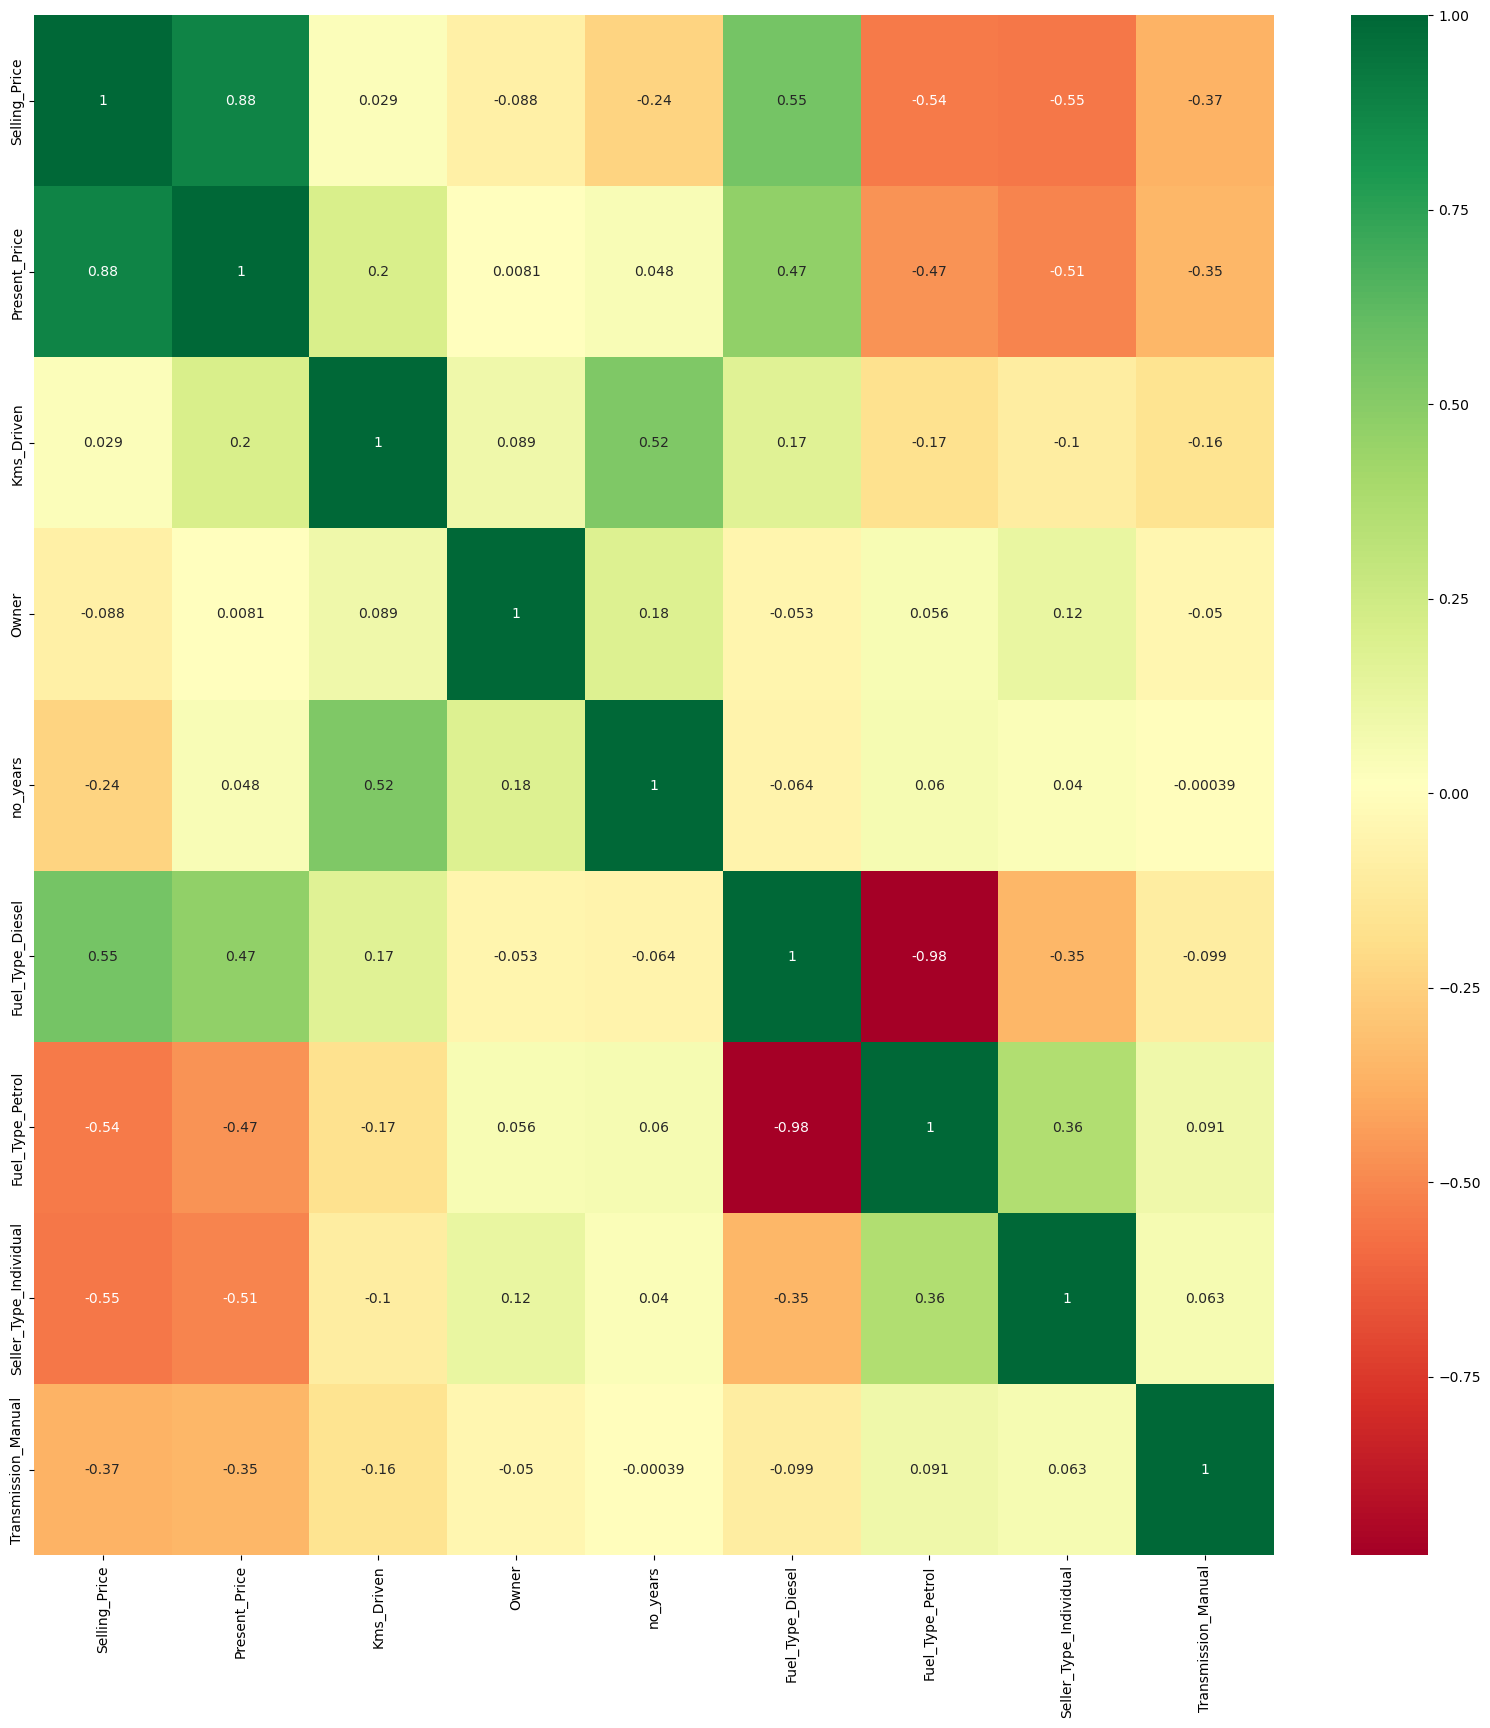

In [41]:
#preparing to create a correlation heatmap to visualize relationships between variables
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plotting the heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
#Indipendent and dependent features 
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [51]:
X.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,False,True,False,True
1,9.54,43000,0,7,True,False,False,True
2,9.85,6900,0,3,False,True,False,True
3,4.15,5200,0,9,False,True,False,True
4,6.87,42450,0,6,True,False,False,True


In [52]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [53]:
#feature importance 
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [54]:
print(model.feature_importances_)

[0.3880707  0.04374277 0.00043168 0.07455212 0.22329543 0.01572674
 0.12449056 0.12969   ]


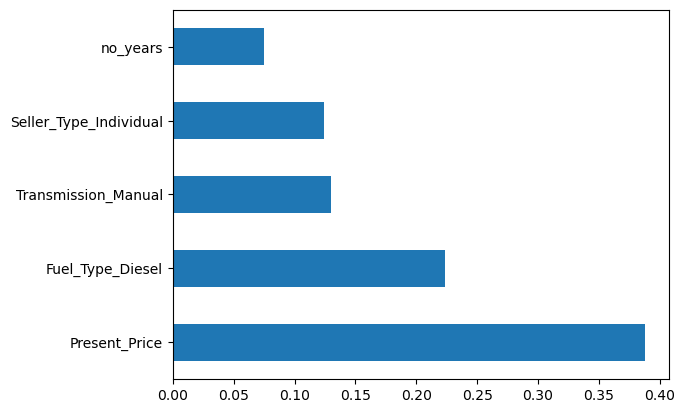

In [55]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [56]:
# Split dataset into training and testing sets
# X_train, y_train: 80% of data used to train the model
# X_test, y_test: 20% of data used to test/evaluate the model's performance
# This helps prevent overfitting and validates the model on unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [57]:
X_train.shape

(240, 8)

In [58]:
#We will be using RandomForestRegresso it is used for predicting continuous values like prices, temperatures, sales, etc.
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [59]:
#hyperparameters
# Hyperparameter tuning: create different values for n_estimators to test
# n_estimators controls the number of trees in the Random Forest
# np.linspace creates 12 evenly spaced values between 100 and 1200
# Testing multiple values helps find the optimal number of trees for best model performance
import numpy as np
n_estimators=[int(x) for x in np.linspace(start = 100 , stop = 1200 , num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [66]:
#Randomized Search CV

#Number oof trees in Random Forest
n_estimators=[int(x) for x in np.linspace(start = 100 , stop = 1200 , num = 12)]

#Nunber of featuers to consider at every split 
max_features=['sqrt', 'log2']

#Maximunm number of levels in trees
max_depth = [int(x) for x in np.linspace(5 , 30 , num = 6)]

#Minimum munnbers of samples required to split node
min_samples_split = [2,5,10,15,100]

#Minimum munnbers of samples required at each leaf node
min_samples_leaf =[1,2,5,10]

In [67]:
from  sklearn.model_selection import RandomizedSearchCV

In [68]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [70]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [71]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
predictions=rf_random.predict(X_test)

In [74]:
predictions

array([ 7.64039,  0.53098,  1.12618,  3.53204,  9.3078 ,  2.65405,
        0.62237,  5.55726,  1.06627,  0.64455,  0.35061,  5.41892,
        0.38977,  4.278  ,  5.69935,  1.5014 ,  0.69051, 13.09888,
       17.911  ,  0.60323,  0.4716 ,  5.31763,  4.76153,  0.50551,
        1.20838,  4.3947 ,  7.0579 ,  4.99481,  8.66377,  0.6148 ,
        5.93055,  3.9986 ,  0.48083,  0.29731,  9.22548,  8.65001,
       10.32924,  0.40934,  5.35749, 10.88486,  6.7262 ,  1.12685,
       22.11642,  0.41928,  4.30044,  9.66811,  0.73682,  4.9239 ,
        3.51925,  0.8739 ,  7.58877,  0.48672,  6.69208,  0.33692,
        0.62276,  6.38818,  0.25867,  7.27472,  0.72485,  7.64677,
        0.54899])

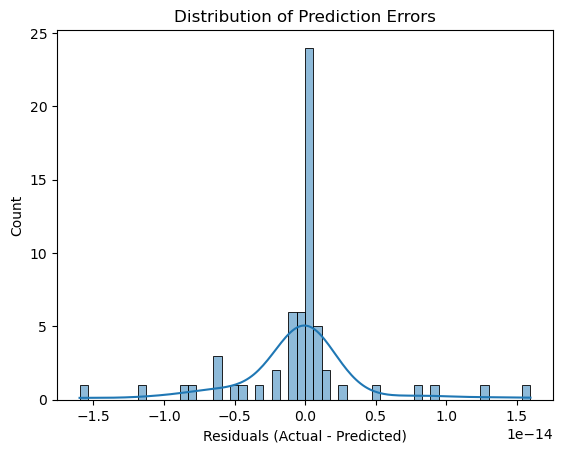

In [76]:
# Plot residuals to check model performance
predictions = model.predict(X_test)
sns.histplot(y_test - predictions, kde=True)
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Distribution of Prediction Errors')
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Count'>

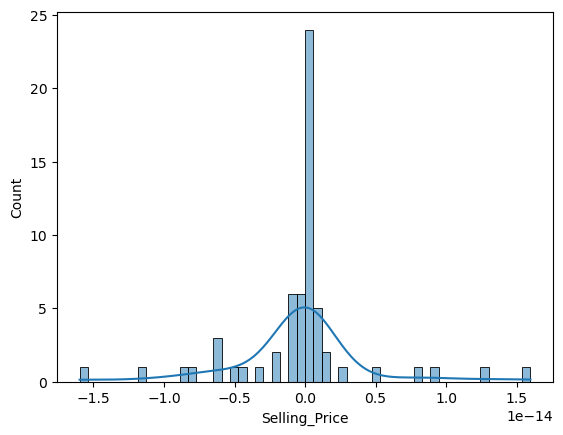

In [78]:
sns.histplot(y_test-predictions, kde=True)

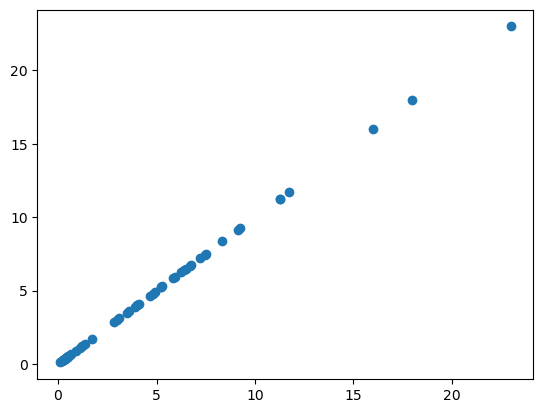

In [79]:
plt.scatter(y_test,predictions)


In [80]:
from sklearn import metrics

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.434755493757874e-15
MSE: 2.1410089602422313e-29
RMSE: 4.627103802857929e-15


In [82]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)